### Imports and other high-level configs

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import config
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

companies = config.companies_of_interest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udayk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### The following cell collects data from Yahoo news about our companies

In [2]:
for company in companies:
    yahoo_url = f"https://news.search.yahoo.com/search?p={company}"
    yahoo_response = requests.get(yahoo_url)
    yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

    yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
    yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

    yahoo_results = []

    for i in range(len(yahoo_titles)):
        title = yahoo_titles[i].text.strip()
        summary = yahoo_summaries[i].text.strip()
        yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News", "company": company})

    # Create dataframe
    results = yahoo_results 
    df = pd.DataFrame(results)

    print(f"Search results for {company}:")
    print(df.head())
    print("--------------------------")

Search results for Twitter:
                                               title  \
0  Twitter Memed Katy Perry Being Super Lost At T...   
1  New Twitter rules expose election offices to s...   
2  See Katy Perry, Lionel Richie and More Perform...   
3  Twitter reacts to Michigan football landing WR...   
4  Where in the world is Marcus Freeman: Kentucky...   

                                             summary      source  company  
0  Video of Katy Perry struggling to find her sea...  Yahoo News  Twitter  
1  The election commission applied weeks ago for ...  Yahoo News  Twitter  
2  VÍDEO: Katy Perry iniciando com “Roar” a sua a...  Yahoo News  Twitter  
3  With the addition to Goodwin, Michigan now has...  Yahoo News  Twitter  
4  A quick search of “Marcus Freeman is everywher...  Yahoo News  Twitter  
--------------------------
Search results for Ebix:
                                               title  \
0  Ebix Is a Cheap Stock With Impressive Growth, ...   
1  Ebix, inc (E

### Visualizations of scrapped data

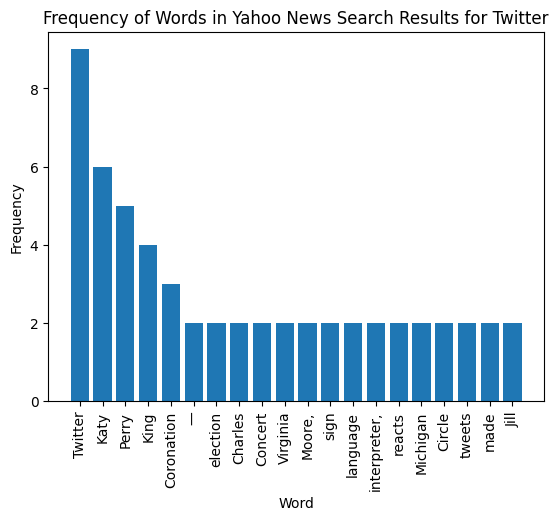

---------------------------------------------------------------------------------------------


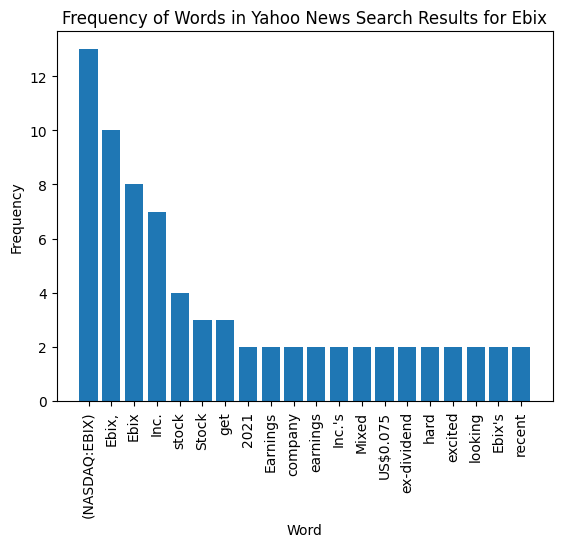

---------------------------------------------------------------------------------------------


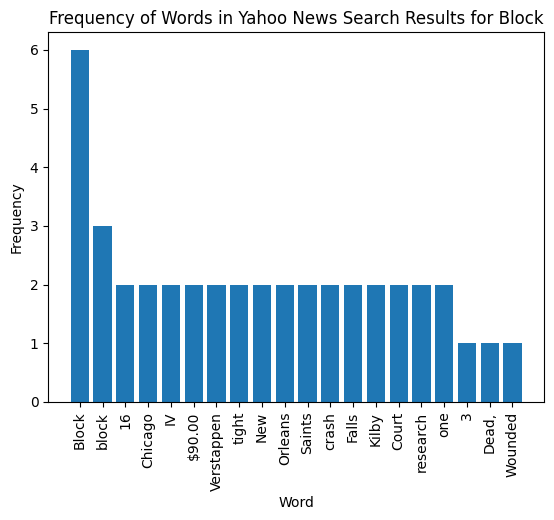

---------------------------------------------------------------------------------------------


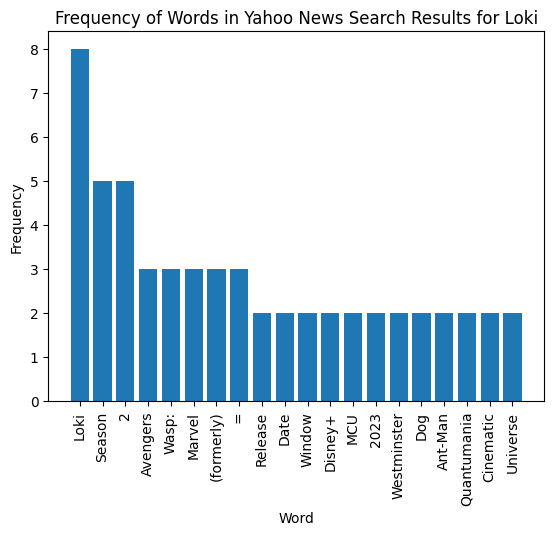

---------------------------------------------------------------------------------------------


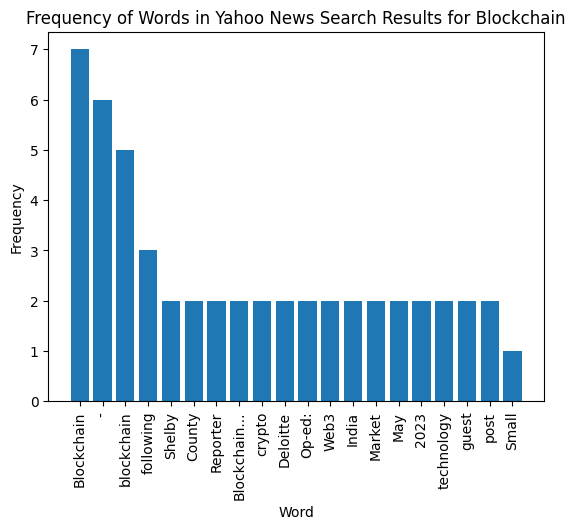

---------------------------------------------------------------------------------------------


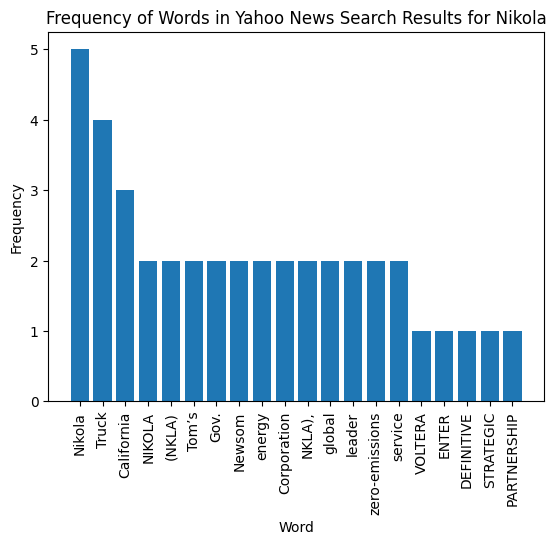

---------------------------------------------------------------------------------------------


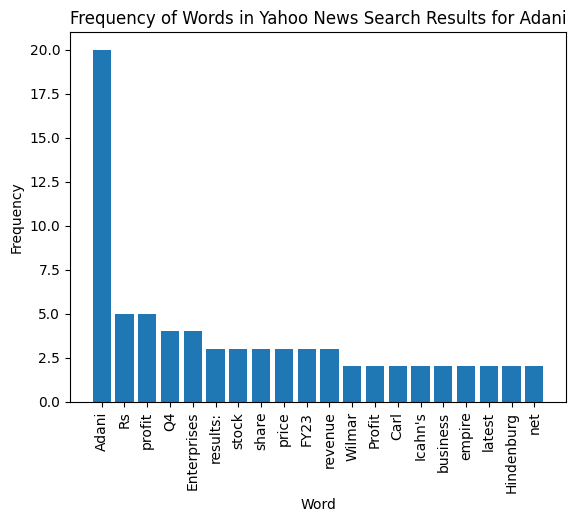

---------------------------------------------------------------------------------------------


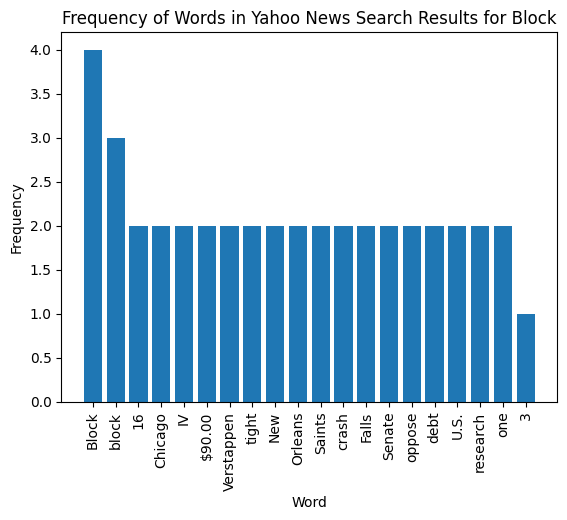

---------------------------------------------------------------------------------------------


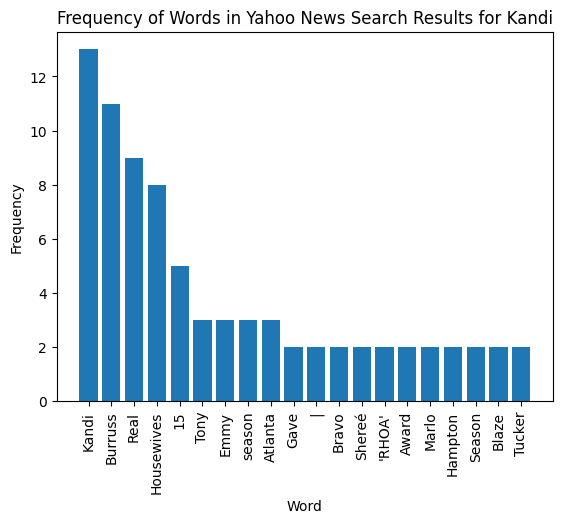

---------------------------------------------------------------------------------------------


KeyError: 'title'

In [5]:
for company in config.companies_of_interest:
    yahoo_url = f"https://news.search.yahoo.com/search?p={company}"
    yahoo_response = requests.get(yahoo_url)
    yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

    yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
    yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

    yahoo_results = []

    for i in range(len(yahoo_titles)):
        title = yahoo_titles[i].text.strip()
        summary = yahoo_summaries[i].text.strip()
        yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News", "company": company})

    # Create dataframe
    results = yahoo_results 
    df = pd.DataFrame(results)

    # Join all titles and summaries into a single string
    text = " ".join(df["title"].tolist() + df["summary"].tolist())

    # Split the text into individual words
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    # Count the frequency of each word
    word_counts = Counter(words)

    # Create a bar chart of the 20 most common words
    most_common_words = word_counts.most_common(20)
    x = [word[0] for word in most_common_words]
    y = [word[1] for word in most_common_words]
    plt.bar(x, y)
    plt.title(f"Frequency of Words in Yahoo News Search Results for {company}")
    plt.xlabel("Word")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Frequency")
    plt.savefig(f"{company}-frequency of words.png", dpi=300, bbox_inches='tight')
    plt.show()
    print("---------------------------------------------------------------------------------------------")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

user_input = input("Enter your search query: ")

# Yahoo News search
yahoo_url = f"https://news.search.yahoo.com/search?p={user_input}"
yahoo_response = requests.get(yahoo_url)
yahoo_soup = BeautifulSoup(yahoo_response.content, "html.parser")

yahoo_titles = yahoo_soup.find_all("h4", class_="s-title")
yahoo_summaries = yahoo_soup.find_all("p", class_="s-desc")

yahoo_results = []

# Remove stop words from titles and summaries
stop_words = set(stopwords.words('english'))
for i in range(len(yahoo_titles)):
    title = yahoo_titles[i].text.strip()
    summary = yahoo_summaries[i].text.strip()

    title_words = title.split()
    title = " ".join([word for word in title_words if word.lower() not in stop_words])

    summary_words = summary.split()
    summary = " ".join([word for word in summary_words if word.lower() not in stop_words])

    yahoo_results.append({"title": title, "summary": summary, "source": "Yahoo News"})

# Create dataframe
results = yahoo_results
df_1 = pd.DataFrame(results)

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df_1)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()


In [ ]:
df_1

In [ ]:
text = " ".join(df["title"].tolist() + df_1["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
search_term = input("Enter a search term: ")
# Get user input for the URL
url = f'https://hindenburgresearch.com/{search_term}'
response = requests.get(url)
# Send a GET request to the URL and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all headers and their related paragraphs
headers = {}
current_header = None
for element in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'p']):
    if element.name.startswith('h'):
        # If a new header is found, update the current header
        current_header = element.text.strip()
        headers[current_header] = []
    elif current_header is not None:
        # If a paragraph is found, add it to the list of paragraphs for the current header
        headers[current_header].append(element.text.strip())

# Create a list of dictionaries with the title, summary and source information
data = []
for header, paragraphs in headers.items():
    data.append({
        'title': header,
        'summary': ' '.join(paragraphs),
        'source': url
    })

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(data)

# Print the dataframe
print(df)


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y="title", data=df)
plt.xlabel("Number of Articles")
plt.ylabel("Article Title")
plt.title("Yahoo News Search Results for: " + user_input)
plt.xticks(rotation=90)
plt.show()

In [ ]:
text = " ".join(df["title"].tolist() + df["summary"].tolist())

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Create a bar chart of the 20 most common words
most_common_words = word_counts.most_common(20)
x = [word[0] for word in most_common_words]
y = [word[1] for word in most_common_words]
plt.bar(x, y)
plt.title("Frequency of Words in Yahoo News Search Results")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['summary'] = df['summary'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['summary'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

# Count word frequency in summary column
word_counts = Counter()
df['title'].str.split().apply(word_counts.update)

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_counts.most_common(10)))
plt.title('Most common words in article summaries')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_1

In [ ]:
df

In [ ]:
result = pd.concat([df_1, df], ignore_index=True)

In [ ]:
result.head()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine the 'title' and 'summary' columns into one
text = ' '.join(result['title']) + ' ' + ' '.join(result['summary'])

# Generate a word cloud for the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud for the title column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'])))
plt.axis('off')
plt.title('Word Cloud for Title Column')
plt.show()

# Plot the word cloud for the summary column
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['summary'])))
plt.axis('off')
plt.title('Word Cloud for Summary Column')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title'].tolist() + result['summary'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get stop words and set up punctuation filter
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
extra_symbols = set(['‘', '’', '“', '”', '’s', '’t', '—', '–', '...'])

# Remove stop words and extra symbols from title column
result['title_clean'] = result['title'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))

# Remove stop words and extra symbols from summary column
result['summary_clean'] = result['summary'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.lower() not in punctuation and word.lower() not in extra_symbols))


In [ ]:
result

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate title and summary columns into one string
text = ' '.join(result['title_clean'].tolist() + result['summary_clean'].tolist())

# Remove stop words
stop_words = ['the', 'and', 'of', 'in', 'to', 'a', 'that', 'for', 'is', 'on', 'with', 'it', 'this', 'as', 'an', 'be', 'by', 'from']
words = [word for word in text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Create a bar plot of the top 10 words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 Most Common Words in Titles and Summaries')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_title_words = [word for title in result['title_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_title_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in title column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from collections import Counter

# Create a list with all the words in the title column
all_summary_words = [word for title in result['summary_clean'] for word in title.split()]

# Count the frequency of each word
title_word_freq = Counter(all_summary_words)

# Get the top 10 most frequent words and their frequencies
top_title_words = title_word_freq.most_common(10)
x_title, y_title = zip(*top_title_words)

# Convert the lists to a pandas series
x_title = pd.Series(x_title)
y_title = pd.Series(y_title)

# Create a barplot with seaborn
sns.barplot(x=y_title, y=x_title)
plt.title('Top 10 most frequent words in summary column')
plt.xlabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

title_lengths = result['title_clean'].str.len()
summary_lengths = result['summary_clean'].str.len()

fig, ax = plt.subplots()
ax.scatter(title_lengths, summary_lengths)
plt.title('Title vs. Summary Lengths')
plt.xlabel('Title Length (Characters)')
plt.ylabel('Summary Length (Characters)')
plt.show()


In [ ]:
# Print the info() method
print(df_1.info())

In [ ]:
# Print the describe() method
print(df_1.describe())

In [ ]:
# Print the head() method
print(df_1.head())

In [ ]:
# Print the tail() method
print(df_1.tail())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

result['length'] = result['title_clean'].str.len() + result['summary_clean'].str.len()
df_1['length'] = df_1['summary'].apply(len)
sns.barplot(x=df_1.index, y='length', data=df_1)
plt.title('Length of Articles')
plt.xlabel('Article Index')
plt.xticks(rotation=90)
plt.ylabel('Length (Characters)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

source_counts = result['source'].value_counts()
labels = source_counts.index.tolist()
sizes = source_counts.values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sources of Articles')
plt.show()


In [ ]:
result.head()

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    return scores


In [ ]:
df_1['title_sentiment'] = df_1['title'].apply(get_sentiment_scores)
df_1['summary_sentiment'] = df_1['summary'].apply(get_sentiment_scores)


In [ ]:
title_sentiment_avg = df_1['title_sentiment'].apply(lambda x: x['compound']).mean()
summary_sentiment_avg = df_1['summary_sentiment'].apply(lambda x: x['compound']).mean()

print("Title sentiment average:", title_sentiment_avg)
print("Summary sentiment average:", summary_sentiment_avg)
